# Letter Recognition

### Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Profiling Treatment](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Preparing and splitting X and Y](#section5)<br>
6. [Decision Tree](#section6)<br>
7. [Naive Bayes](#section7)<br>
8. [SVM](#section8)<br>
9. [KNN](#section9)<br>
10. [Random Forest](#section10)<br>
11. [Stochastic Gradient Booster](#section11)<br>
12. [Ensamble voting classifier](#section12)<br>
13. [Summary](#section13)<br>
14. [Predicting the letter category](#section14)<br>

<a id=section1></a>

### 1.Problem Statement

The objective is to __identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet__. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.

<a id=section1></a>

<a id=section2></a>

### 2.Data Description

The dataset consists of train and test files.  __Train file__ with __16000 samples and 18 features__, used to build and train the model.  The built model was predicted on the __test file__ with __3999 samples and 17 features__.  

| Column Name    | Description                              |
| -------------  |:-------------                           :| 
| letter         | capital letter (26 values from A to Z)   | 
| x-box          | horizontal position of box               |  
| y-box          | vertical position of box                 | 
| width          | width of box                             |   
| high           | height of box                            |
| onpix          | total # on pixels                        |
| x-bar          | mean x of on pixels in box               |
| y-bar          | mean y of on pixels in box               |
| x2bar          | mean x variance                          |
| y2bar          | mean y variance                          |
| xybar          | mean x y correlation                     |
| x2ybr          | mean of x * x * y                        |
| xy2br          | mean of x * y * y                        |
| x-ege          | mean edge count left to right            |
| xegvy          | correlation of x-ege with y              |
| y-ege          | mean edge count bottom to top            |
| yegvx          | correlation of y-ege with x              |

In [1]:
import numpy as np                                            # Implemennts milti-dimensional array and matrices
import pandas as pd                                           # For data manipulation and analysis
import matplotlib.pyplot as plt                               # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                         # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline                                           
# Allow plots to appear directly in the notebook

from sklearn import metrics                                                             #Classfication model metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score     #Classfication model metrics
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML                 
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Importing train dataset using pd.read_csv
train = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_train.csv')    
train.head()                                                  #Gives the first five rows of the dataset

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


In [3]:
train.shape              #Gives the number of rows and columns in the dataframe

(16000, 18)

In [4]:
#Importing test dataset using pd.read_csv
test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_test.csv')    
test.head()                                                  #Gives the first five rows of the dataset

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8,16001
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10,16002
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8,16003
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7,16004
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6,16005


In [5]:
test.shape              #Gives the number of rows and columns in the dataframe

(3999, 17)

<a id=section2></a>

<a id=section3></a>

### 3.Data profiling and treatment

In [6]:
bigdata = train.append(test)   #Append datasets
bigdata.tail()

,high,id,letter,onpix,width,x-bar,x-box,x-ege,x2bar,x2ybr,xegvy,xy2br,xybar,y-bar,y-box,y-ege,y2bar,yegvx
3994,3,19995,NaN,2,3,7,2,2,7,6,8,4,6,7,2,3,6,7
3995,8,19996,NaN,4,8,4,7,2,6,9,9,13,12,8,10,3,9,7
3996,7,19997,NaN,5,6,6,6,2,3,9,12,5,11,11,9,2,7,4
3997,2,19998,NaN,1,4,8,2,1,2,6,9,8,10,7,3,5,6,8
3998,6,19999,NaN,2,6,9,4,2,3,1,7,8,8,5,9,2,1,8


In [7]:
bigdata.shape              #Gives the number of rows and columns in the dataframe

(19999, 18)

In [8]:
bigdata.info()                        #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999 entries, 0 to 3998
Data columns (total 18 columns):
high      19999 non-null int64
id        19999 non-null int64
letter    16000 non-null object
onpix     19999 non-null int64
width     19999 non-null int64
x-bar     19999 non-null int64
x-box     19999 non-null int64
x-ege     19999 non-null int64
x2bar     19999 non-null int64
x2ybr     19999 non-null int64
xegvy     19999 non-null int64
xy2br     19999 non-null int64
xybar     19999 non-null int64
y-bar     19999 non-null int64
y-box     19999 non-null int64
y-ege     19999 non-null int64
y2bar     19999 non-null int64
yegvx     19999 non-null int64
dtypes: int64(17), object(1)
memory usage: 2.9+ MB


In [9]:
bigdata.describe()

,high,id,onpix,width,x-bar,x-box,x-ege,x2bar,x2ybr,xegvy,xy2br,xybar,y-bar,y-box,y-ege,y2bar,yegvx
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.00000
mean,5.372469,10000.000000,3.505975,5.121956,6.897545,4.023651,3.046252,4.628831,6.453823,8.338867,7.928996,8.282164,7.500175,7.035452,3.691935,5.178609,7.80119
std,2.261445,5773.358353,2.190441,2.014568,2.026071,1.913206,2.332500,2.699837,2.631016,1.546759,2.080671,2.488485,2.325087,3.304631,2.567004,2.380875,1.61751
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,4.000000,5000.500000,2.000000,4.000000,6.000000,3.000000,1.000000,3.000000,5.000000,8.000000,7.000000,7.000000,6.000000,5.000000,2.000000,4.000000,7.00000
50%,6.000000,10000.000000,3.000000,5.000000,7.000000,4.000000,3.000000,4.000000,6.000000,8.000000,8.000000,8.000000,7.000000,7.000000,3.000000,5.000000,8.00000
75%,7.000000,14999.500000,5.000000,6.000000,8.000000,5.000000,4.000000,6.000000,8.000000,9.000000,9.000000,10.000000,9.000000,9.000000,5.000000,7.000000,9.00000
max,15.000000,19999.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000


In [10]:
bigdata.columns     #gives the dataframe columns  

Index(['high', 'id', 'letter', 'onpix', 'width', 'x-bar', 'x-box', 'x-ege',
       'x2bar', 'x2ybr', 'xegvy', 'xy2br', 'xybar', 'y-bar', 'y-box', 'y-ege',
       'y2bar', 'yegvx'],
      dtype='object')

In [11]:
bigdata.letter.unique()       #gives the unique classes of variable letter

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z',
       nan], dtype=object)

<a id=section3></a>

<a id=section4></a>

### 4.Exploratory Data Analysis

In [12]:
train = train.sort_values('letter')         #Sort the rows as per variable letter

Text(0.5, 1.0, 'Letter count')

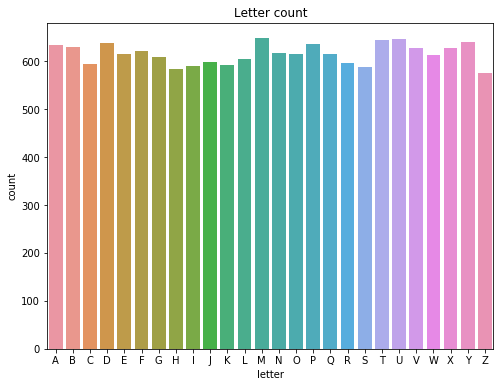

In [13]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = train,x = 'letter')
plt.title('Letter count')

In [14]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  #For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

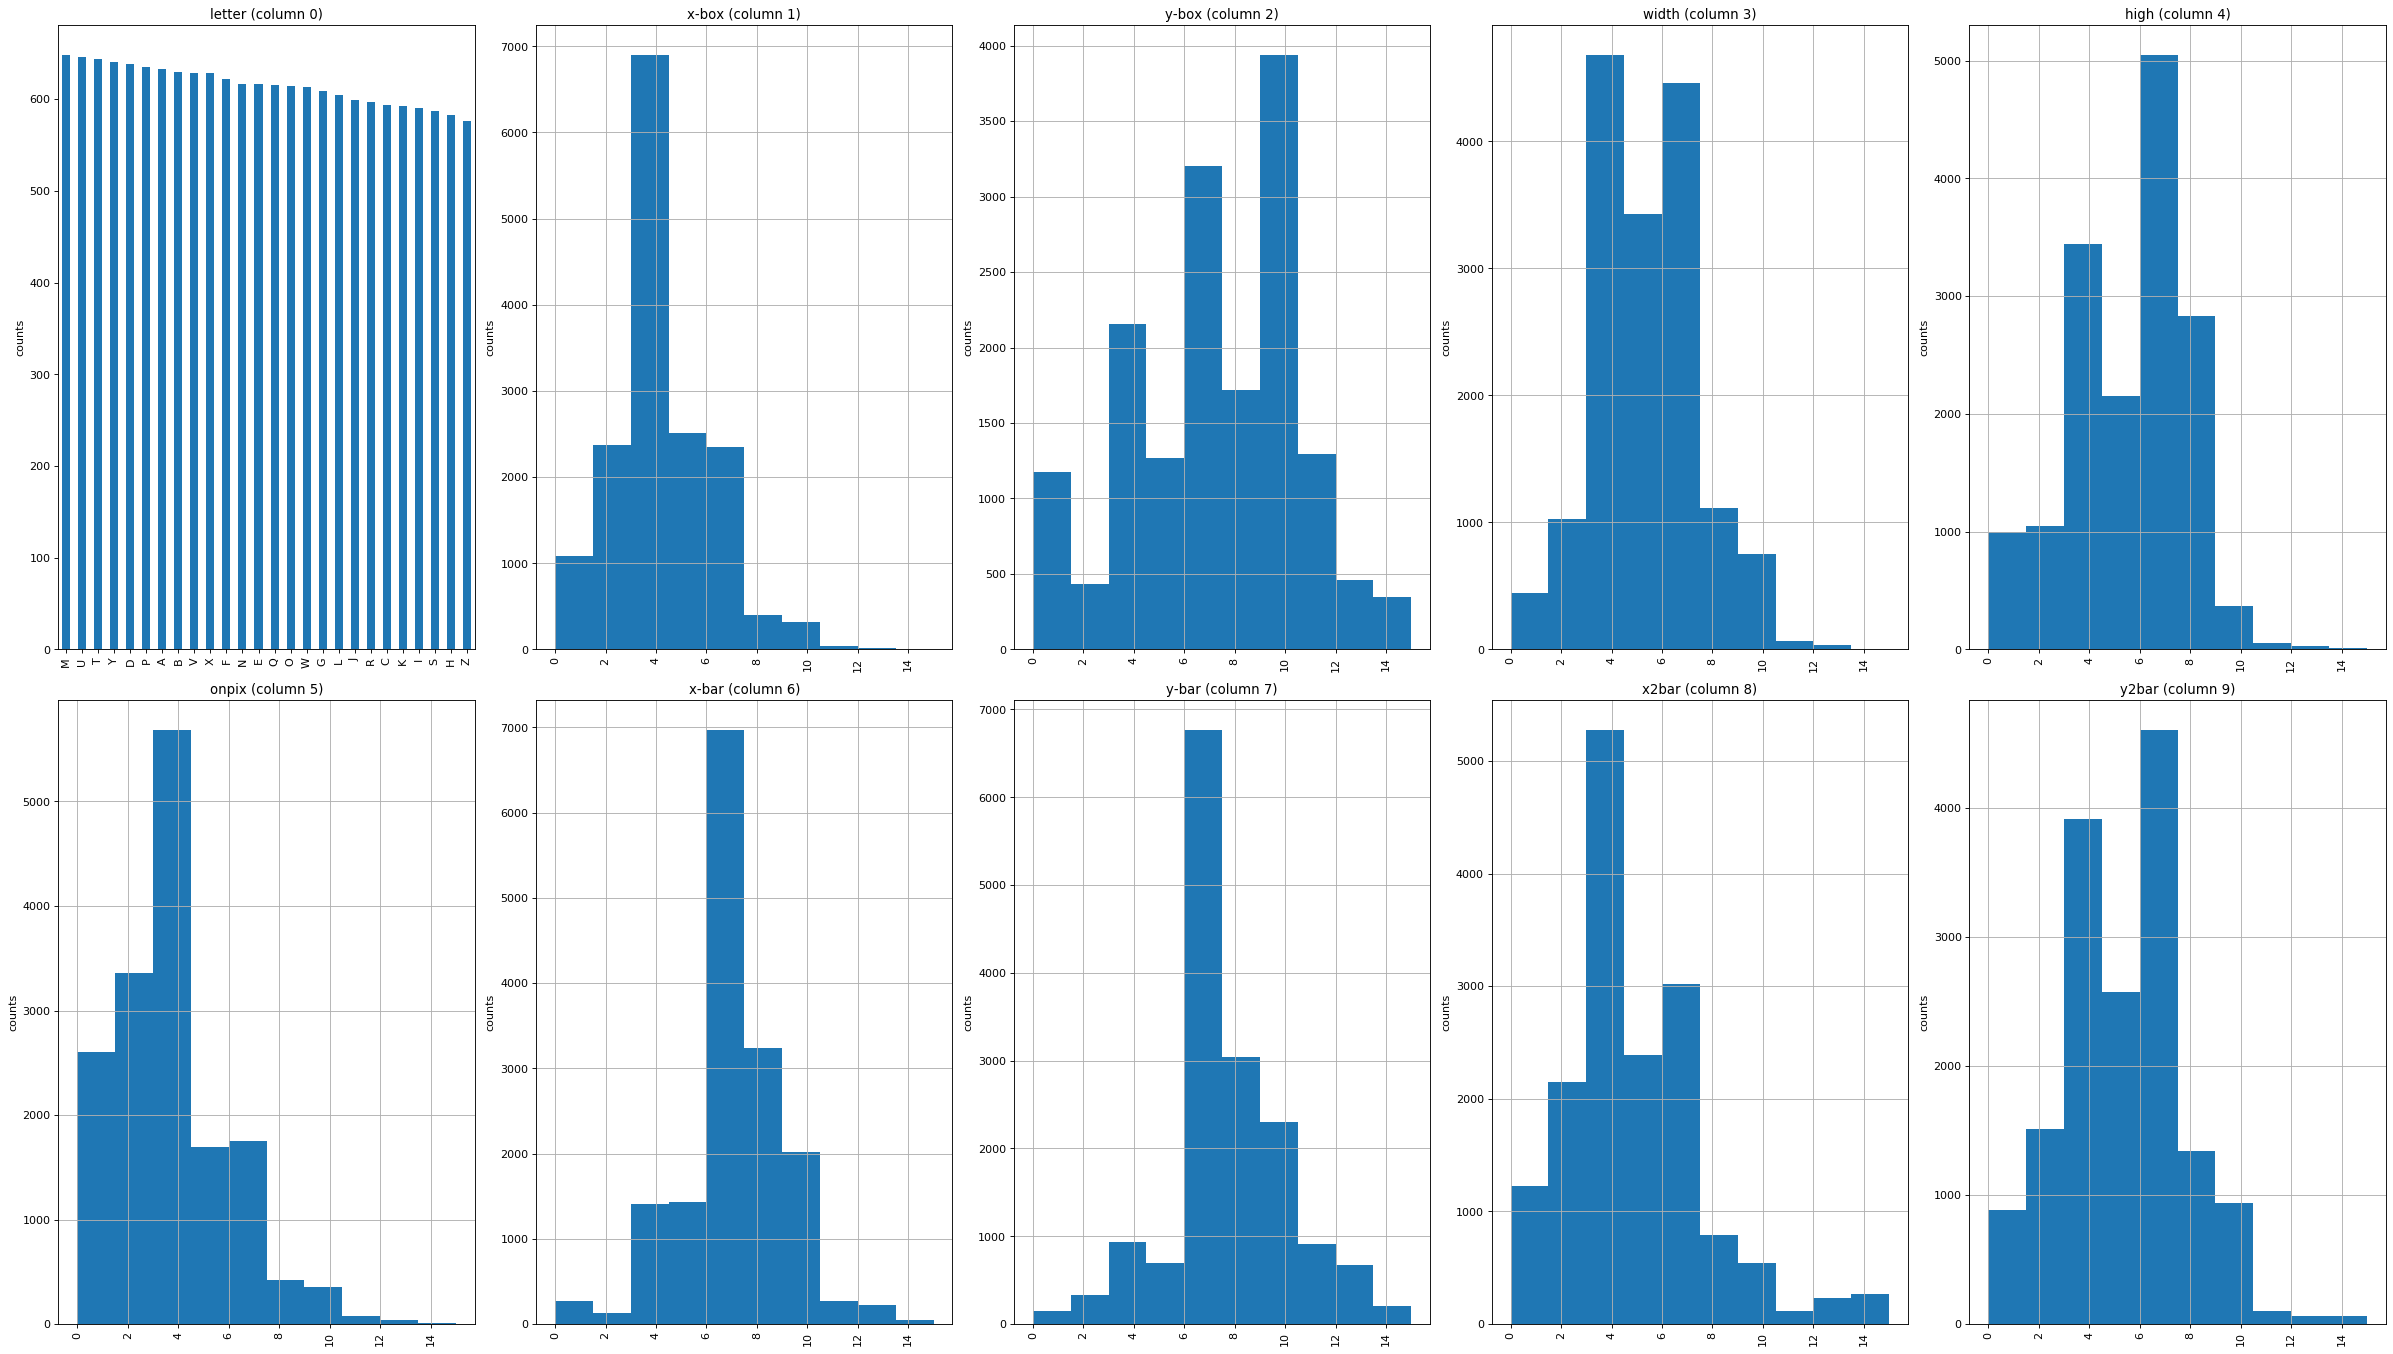

In [15]:
plotPerColumnDistribution(train, 10, 5)

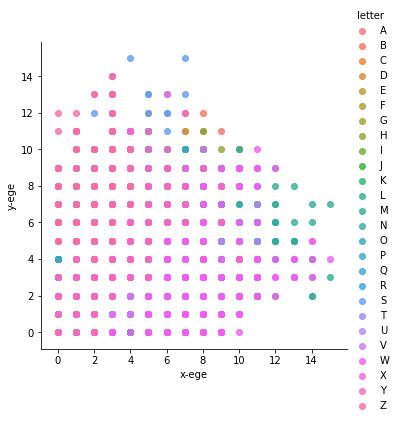

In [16]:
sns.lmplot(x='x-ege', y='y-ege', hue='letter', 
           data=train, 
           fit_reg=False)

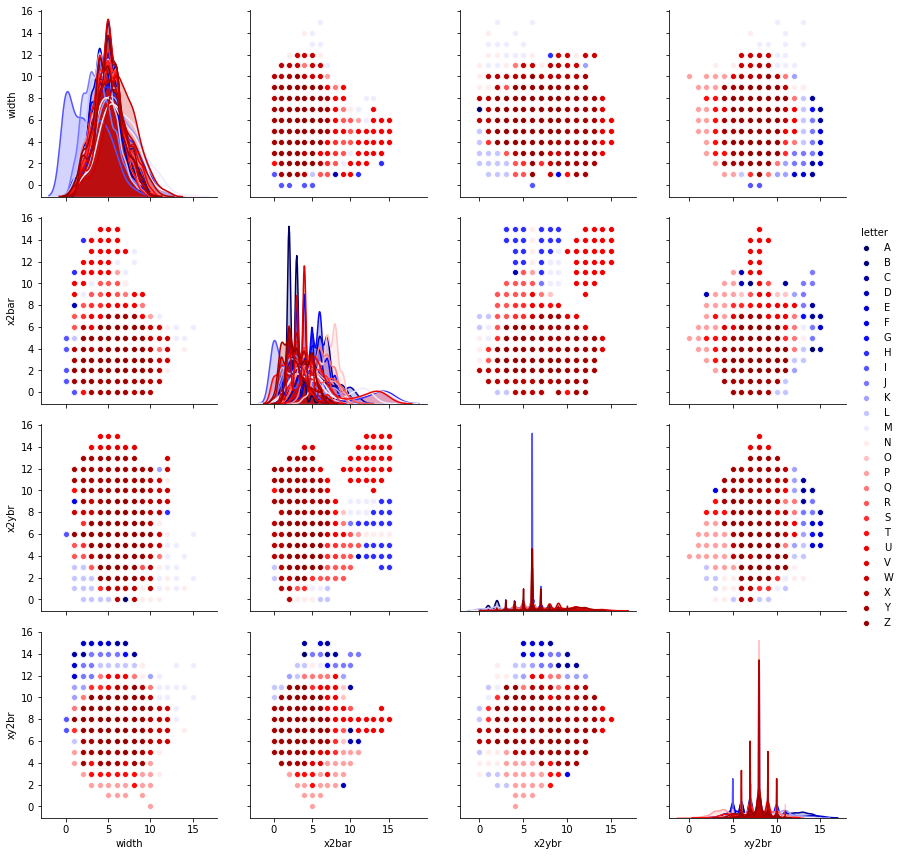

In [17]:
sns.pairplot(train[['letter', 'width', 'x2bar','x2ybr','xy2br']], 
        hue='letter', palette = 'seismic',size=3, diag_kind = 'kde')

The diagonal graph helps us understand Width, x2bar, x2ybr and xy2br variables contribution in the letter classification.

Text(0.5, 1, 'Correlation between features')

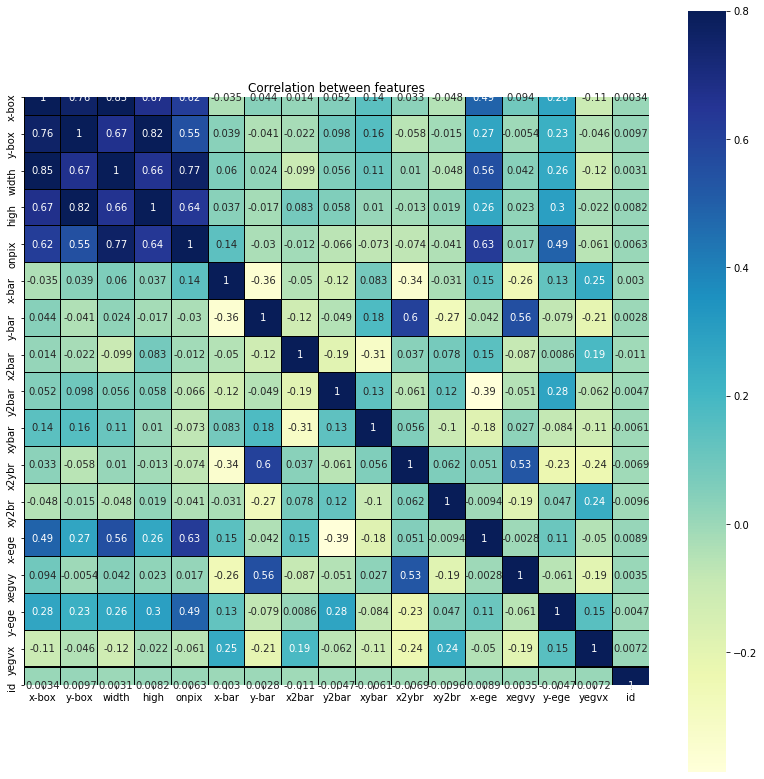

In [18]:
corr = train.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

x-box, y-box, width, high, onpix are positively correlated.  x-bar, y-bar, x2ybr, xy2br are negatively correlated.

<a id=section4></a>

<a id=section5></a>

### 5. Preparing and splitting X and Y

In [19]:
train = train.drop(['id'], axis=1)       #Drop id variable
test = test.drop(['id'], axis=1)

In [20]:
x_train = train.loc[:,train.columns != 'letter']          #Preparing train X and Y
y_train = train.letter

In [21]:
scaler = MinMaxScaler().fit(x_train)                    #Standardising train x
x_train = scaler.transform(x_train)

In [22]:
x_test = test.loc[:,:]                  #Preparing test X and Y
x_test = scaler.transform(x_test)       #Standardising test x

In [23]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

train['letter'] = le.fit_transform(train['letter'])

In [24]:
train.sample()          #check the changes

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
14435,0,2,3,3,1,1,11,2,3,1,9,2,9,1,6,2,8


In [25]:
 def classify(model,x_train,y_train,algo):
    '''Function to predict and calculate the matrices for model evaluation'''
    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    score = pd.DataFrame({'Algorithm': [algo],
                          'Accuracy': [accuracy_score(y_train,y_pred)],
                          'f1_Score': [f1_score(y_train,y_pred, average='macro')]})
    return score

<a id=section5></a>

<a id=section6></a>

### 6.Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

dt_clf = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
algo = 'DecisionTree'
dt_results = classify(dt_clf,x_train,y_train,algo)
dt_results

,Algorithm,Accuracy,f1_Score
0,DecisionTree,0.999875,0.999876


<a id=section6></a>

<a id=section7></a>

### 7.Naive Bayes

In [27]:
from sklearn import naive_bayes
model=naive_bayes.GaussianNB()
algo = 'NaiveBayes'
nb_results = classify(model,x_train,y_train,algo)
nb_results

,Algorithm,Accuracy,f1_Score
0,NaiveBayes,0.651125,0.646085


<a id=section7></a>

<a id=section8></a>

### 8.SVM

In [28]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear',C=9)
algo = 'SVM'
svm_results = classify(svm_clf,x_train,y_train,algo)
svm_results

,Algorithm,Accuracy,f1_Score
0,SVM,0.860625,0.859713


<a id=section8></a>

<a id=section9></a>

### 9.KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')   #Instantiate K nearest neighbour classifier
algo = 'KNN'
knn_results = classify(knn_clf,x_train,y_train,algo)
knn_results

,Algorithm,Accuracy,f1_Score
0,KNN,0.960187,0.960086


<a id=section9></a>

<a id=section10></a>

### 10.RandomForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state = 0,n_estimators=14)
algo = 'RandomForest'
rf_results = classify(rnd_clf,x_train,y_train,algo)
rf_results

,Algorithm,Accuracy,f1_Score
0,RandomForest,0.999812,0.999816


<a id=section10></a>

<a id=section11></a>

### 11.SGDClassifier

In [31]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'hinge')
algo = 'SGD'
sgd_results = classify(sgd_clf,x_train,y_train,algo)
sgd_results

,Algorithm,Accuracy,f1_Score
0,SGD,0.602125,0.600893


<a id=section11></a>

<a id=section12></a>

### 12.Ensemble Voting Classifer

In [39]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators = [('dt', dt_clf), ('rnd', rnd_clf), ('knn',knn_clf)],voting = 'hard')
algo = 'EnsembleVotingClassifier'
en_results = classify(voting_clf,x_train,y_train,algo)
en_results

,Algorithm,Accuracy,f1_Score
0,EnsembleVotingClassifier,0.999812,0.999816


<a id=section12></a>

<a id=section13></a>

### 13.Summary

In [43]:
pd.concat([dt_results, nb_results, rf_results, knn_results, svm_results, sgd_results, en_results], axis=0, ignore_index=True)

,Algorithm,Accuracy,f1_Score
0,DecisionTree,0.999875,0.999876
1,NaiveBayes,0.651125,0.646085
2,RandomForest,0.999812,0.999816
3,KNN,0.960187,0.960086
4,SVM,0.860625,0.859713
5,SGD,0.602125,0.600893
6,EnsembleVotingClassifier,0.999812,0.999816


__Decision tree__ model has got the highest score in all the metric test and with __99.9% accuracy__.  This model is used to predict the test observations.

<a id=section13></a>

<a id=section14></a>

### 14.Predicting the letter category for test data

In [40]:
dt_clf.fit(x_train, y_train)      #Fit the model
y_pred = dt_clf.predict(x_test)   #predict the test observations

In [41]:
y_pred = le.inverse_transform(y_pred)     #Decode the labelled values

In [42]:
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

<a id=section14></a>